# **Accidentes aéreos desde 1908** (Data Science y Machine Learning)

Fuente: [Kaggle](https://www.kaggle.com/datasets/saurograndi/airplane-crashes-since-1908)

**Acerca del conjunto de datos:**

Accidentes aéreos y muertes desde 1908 (Historia completa de los accidentes aéreos en todo el mundo, desde 1908 hasta la actualidad).

Cuando se creó este conjunto de datos en Kaggle (9 de septiembre de 2016), la versión original estaba alojada en Open Data by Socrata en: https://opendata.socrata.com/Government/Airplane-Crashes-and-Fatalities-Since-1908/q2te-8cvq , pero lamentablemente ya no está disponible. El conjunto de datos contiene información sobre accidentes aéreos que involucraron transporte civil, comercial y militar en todo el mundo desde el 17 de septiembre de 1908 hasta el 8 de junio de 2009.

Este conjunto de datos podría resolver las siguientes preguntas:

1.  ¿Cuántos aviones se estrellaron anualmente? ¿Cuántas personas iban a bordo? ¿Cuántos sobrevivieron? ¿Cuántos murieron?
2.  Mayor número de accidentes por operador y tipo de aeronave.
3.  El campo "Summary" contiene los detalles de los accidentes. Encuentre las causas del accidente y clasifíquelas en diferentes grupos, por ejemplo, incendio, derribo, clima (los "espacios en blanco" en la categoría de datos pueden ser DESCONOCIDOS). Puede crear los grupos que desee, pero no deben exceder 7.
4.  Encuentre el número de aeronaves estrelladas y el número de muertes para cada categoría del paso anterior.
5.  Encuentre cualquier tendencia o comportamiento interesante que encuentre al analizar el conjunto de datos.

# **1. Emarcar el problema**

# Problema/Objetivo
Encuentre las causas del accidente y clasifíquelas en diferentes grupos, por ejemplo, incendio, derribo, clima (los "espacios en blanco" en la categoría de datos pueden ser DESCONOCIDOS). Puede crear los grupos que desee, pero no deben exceder 7.

Encuentre el número de aeronaves estrelladas y el número de muertes para cada categoría del paso anterior.

Encuentre cualquier tendencia o comportamiento interesante que encuentre al analizar el conjunto de datos.

Este conjunto de datos incluye:

* Todos los accidentes de aviación civil y comercial de aviones de pasajeros programados y no programados en todo el mundo, que resultaron en una fatalidad (incluidos todos los accidentes fatales de las Partes 121 y 135 de los EE. UU.)
* Todos los accidentes mortales de carga, posicionamiento, transporte y vuelos de prueba.
* Todos los accidentes de transporte militar con 10 o más víctimas mortales.
* Todos los accidentes de helicópteros comerciales y militares con más de 10 víctimas mortales.
* Todos los accidentes de aeronaves civiles y militares que impliquen víctimas mortales.
* Accidentes de aviación que implican la muerte de personajes famosos.
* Accidentes o incidentes de aviación de interés notable.


# Tipo de problema
Dependerá del objetivo concreto:

a. Análisis Exploratorio de Datos (EDA)
* No supervisado. Sirve para detectar patrones, tendencias y correlaciones.

* Técnicas: agrupaciones (clustering), análisis de componentes principales (PCA), estadísticas descriptivas, visualización.

b. Clasificación de causas del accidente
* Supervisado (si etiquetas manualmente las causas del campo Summary).
* Problema de clasificación multiclase (hasta 7 clases).
* Objetivo: predecir la causa del accidente según otros factores (tipo de avión, operador, ruta, año, etc.).

c. Predicción del número de muertes o sobrevivientes
* Supervisado. Problema de regresión.
* Objetivo: predecir Fatalities o Abroad - Fatalities = Survivors.

# Datos
*  Fichero: Airplane_Crashes_and_Fatalities_Since_1908.csv
*  Formato: CSV
*  Filas: 5268
*  Columnas: 13
     
      -Date (Fecha del accidente, en el formato: 1 de enero de 2001)
      
      -Time (Hora local, en formato de 24 horas a menos que se especifique lo contrario)
      
      -Location (Lugar del accidente)
      
      -Operation (Aerolínea u operador de la aeronave)
      
      -Flight (Número de vuelo asignado por el operador de la aeronave)
      
      -Route (Ruta completa o parcial volada antes del accidente)

      -Type (Tipo de aeronave)

      -Registration (Matrícula de la aeronave en la OACI)

      -cn/In (Número de construcción o de serie / Número de línea o de fuselaje)

      -Abourd (Total a bordo (pasajeros/tripulación)

      -Fatalities (Total de víctimas mortales a bordo (pasajeros/tripulación))

      -Ground (Total de muertos en tierra)

      -Summary (Breve descripción del accidente y causa si se conoce)


# ¿Qué algoritmo podríamos usar?

Para clasificación (Causas del accidente):
* Random Forest Classifier
* XGBoost Classifier
* Logistic Regression (si reduces clases)
* Naive Bayes (si haces ingeniería de texto sobre el Summary)

Para regresión (muertes):
* Linear Regression
* Random Forest Regressor
* XGBoost Regressor
* Redes neuronales (MLPRegressor)

Para agrupación (no supervisado):
* K-Means
* DBSCAN
* PCA para reducción de dimensionalidad

# Metricas recomendadas
* MAE (Error Absoluto Medio)
* MSE (Error Cuadrático Medio)
* R² (Coeficiente de determinación)

# Predicciones o insights posibles
Análisis histórico:
* Evolución de accidentes por década
* Relación entre tipo de aeronave y accidentes
* Regiones o países con más incidentes
* Operadores con más siniestros

Predicciones:
* Probabilidad de accidente según el operador y tipo de aeronave
* Severidad esperada (muertes) según variables como año, tipo de avión, etc.
* Clasificación automática de la causa desde el texto del Summary (con NLP)

Agrupación:
* Clústeres de accidentes similares por hora, lugar, tipo, operador…
* Análisis de patrones por estaciones o días de la semana      


# **2. Carga de datos**

In [ ]:
import pandas as pd # importar librería pandas
import matplotlib.pyplot as plt # visualizar datos
import seaborn as sns # visualizar datos

## crear DataFrame desde csv
df_airplane = pd.read_csv('sample_data/Airplane_Crashes_and_Fatalities_Since_1908.csv')
df_airplane

Date   Time                                           Location  \
0     09/17/1908  17:18                                Fort Myer, Virginia   
1     07/12/1912  06:30                            AtlantiCity, New Jersey   
2     08/06/1913    NaN                 Victoria, British Columbia, Canada   
3     09/09/1913  18:30                                 Over the North Sea   
4     10/17/1913  10:30                         Near Johannisthal, Germany   
...          ...    ...                                                ...   
5263  05/20/2009  06:30                             Near Madiun, Indonesia   
5264  05/26/2009    NaN                  Near Isiro, DemocratiRepubliCongo   
5265  06/01/2009  00:15  AtlantiOcean, 570 miles northeast of Natal, Br...   
5266  06/07/2009  08:30       Near Port Hope Simpson, Newfoundland, Canada   
5267  06/08/2009    NaN                  State of Arunachal Pradesh, India   

                             Operator Flight #  \
0                Military - U.S. Army      NaN   
1                Military - U.S. Navy      NaN   
2                             Private        -   
3              Military - German Navy      NaN   
4              Military - German Navy      NaN   
...                               ...      ...   
5263  Military - Indonesian Air Force      NaN   
5264                      Service Air      NaN   
5265                       Air France      447   
5266                       Strait Air      NaN   
5267      Military - Indian Air Force      NaN   

                                          Route  \
0                                 Demonstration   
1                                   Test flight   
2                                           NaN   
3                                           NaN   
4                                           NaN   
...                                         ...   
5263                           Jakarta - Maduin   
5264                               Goma - Isiro   
5265                     Rio de Janeiro - Paris   
5266  Lourdes de BlanSablon - Port Hope Simpson   
5267                         Mechuka for Jorhat   

                                  Type Registration cn/In  Aboard  Fatalities  \
0                     Wright Flyer III          NaN     1     2.0         1.0   
1                            Dirigible          NaN   NaN     5.0         5.0   
2                     Curtiss seaplane          NaN   NaN     1.0         1.0   
3               Zeppelin L-1 (airship)          NaN   NaN    20.0        14.0   
4               Zeppelin L-2 (airship)          NaN   NaN    30.0        30.0   
...                                ...          ...   ...     ...         ...   
5263           Lockheed C-130 Hercules       A-1325  1982   112.0        98.0   
5264                     Antonov An-26       9Q-CSA  5005     4.0         4.0   
5265                   Airbus A330-203       F-GZCP   660   228.0       228.0   
5266  Britten-Norman BN-2A-27 Islander      C-FJJR    424     1.0         1.0   
5267                     Antonov An-32          NaN   NaN    13.0        13.0   

      Ground                                            Summary  
0        0.0  During a demonstration flight, a U.S. Army fly...  
1        0.0  First U.S. dirigible Akron exploded just offsh...  
2        0.0  The first fatal airplane accident in Canada oc...  
3        0.0  The airship flew into a thunderstorm and encou...  
4        0.0  Hydrogen gas which was being vented was sucked...  
...      ...                                                ...  
5263     2.0  While on approach, the military transport cras...  
5264     NaN  The cargo plane crashed while on approach to I...  
5265     0.0  The Airbus went missing over the AtlantiOcean ...  
5266     0.0  The air ambulance crashed into hills while att...  
5267     0.0  The military transport went missing while en r...  

[5268 rows x 13 columns]



---



# **3. Analisis Exploratorio de los Datos** (EDA)

In [ ]:
df_airplane.info() # Resumen estructural

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          3049 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-null   object 
 4   Flight #      1069 non-null   object 
 5   Route         3561 non-null   object 
 6   Type          5241 non-null   object 
 7   Registration  4933 non-null   object 
 8   cn/In         4040 non-null   object 
 9   Aboard        5246 non-null   float64
 10  Fatalities    5256 non-null   float64
 11  Ground        5246 non-null   float64
 12  Summary       4878 non-null   object 
dtypes: float64(3), object(10)
memory usage: 535.2+ KB


In [ ]:
df_airplane.describe() # Resumen  estadístico
# Solo se describen los numéricos

Aboard   Fatalities       Ground
count  5246.000000  5256.000000  5246.000000
mean     27.554518    20.068303     1.608845
std      43.076711    33.199952    53.987827
min       0.000000     0.000000     0.000000
25%       5.000000     3.000000     0.000000
50%      13.000000     9.000000     0.000000
75%      30.000000    23.000000     0.000000
max     644.000000   583.000000  2750.000000

In [ ]:
# Contabilizar valores nulos
print(df_airplane.isnull().sum())

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1707
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64


In [ ]:
# contar valores por columna
df_airplane.count()

Date            5268
Time            3049
Location        5248
Operator        5250
Flight #        1069
Route           3561
Type            5241
Registration    4933
cn/In           4040
Aboard          5246
Fatalities      5256
Ground          5246
Summary         4878
dtype: int64

In [ ]:
print(df_airplane['Time'].isnull())

0       False
1       False
2        True
3       False
4       False
        ...  
5263    False
5264     True
5265    False
5266    False
5267     True
Name: Time, Length: 5268, dtype: bool


In [ ]:
# Verificar si hay filas duplicadas
duplicated_rows = df_airplane.duplicated()
num_duplicated_rows = duplicated_rows.sum()
print(f'Número de filas duplicadas: {num_duplicated_rows}')

Número de filas duplicadas: 0


In [ ]:
# variables categóricas
df_airplane.value_counts()

Date        Time   Location                        Operator                                Flight #  Route                                                  Type                                 Registration  cn/In          Aboard  Fatalities  Ground  Summary                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
12/26/1994  17:00  Algiers Airport, Algeria        Air France                              8969      Alger - Paris                                          Airbus A300B2-1C                     F-GBEC        104            239.0   3.0         0.0     The aircraft was hijacked by terrorists. Three passengers and four hijackers were killed when the plane was stormed.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              1
12/26/1989  22:30  Pasco, Washington               United Express                          2415      Yakima - Pasco                                         British Aerospace 3101 Jetstream 31  N410UE        776            6.0     6.0         0.0     The aircraft was observed sinking fast while attempting to land at Pasco. The aircraft suddenly nosed over and crashed short of the runway. The crew's decision to continue an unstabilized instrument landing system approach that led to a stall, most likely of the horizontal stabilizer, and loss of control at low altitude. Contributing to the accident was the air trafficontroller's improper vectors that positioned the aircraft inside the outer marker while it was still well above the glideslope. Contributing to the stall and loss of control was the accumulation of airframe ice that degraded the aerodynamiperformance of the airplane.    1
12/26/1958  12:52  Salisbury, Zimbabwe             Union Aeromaritime de Transport         736       Johannesberg - Salisbury - Brazzaville - Nice - Paris  Douglas DC-6B                        F-BGTZ        43827/337      70.0    3.0         0.0     The aircraft took off into heavy thunderstorms, was not able to maintain height and airspeed and crashed to the ground. The aircraft struck the ground shortly after takeoff as a result of an uncontrollable loss of airspeed and height due to a sudden squall accompanying the onset of a thunderstorm.                                                                                                                                                                                                                                                                                                                                                        1
12/25/2003  14:55  Cotonou, Benin                  Union des Transports Aeriens de Guinee  141       Conakry, Guinea - Cotonou, Benin - Beirut, Lebanon     Boeing B-727-223                     3X-GDO        21090          161.0   140.0       0.0     The B-727 was barely able to climb after taking off from Cotonou Airport. The landing gear struck a building housing electronics, crashed through the barrier fence and broke up al

In [ ]:
# sacar valores serie
# print(df_airplane.sum())  # En este caso no es posible porque la mayoría son objeto y es necessario hacer transformaciones en la siguiente etapa

In [ ]:
# contar valores únicos de Aerilienas de 5250
df_airplane['Operator'].unique().size

2477

In [ ]:
# contar valores únicos de Rutas de 3561
df_airplane['Route'].unique().size

3244

In [ ]:
# contar cada valor serie
# df_airplane.value_counts(ascending=True) # Innecesario para este caso

In [ ]:
df_airplane['Route'].sort_values(ascending=True)

3830             - Tegucigalpa - Toncontin
4322                    AZ - Las Vegas, NV
4799                         Abaco - Miami
1234                       Abadan - Tehran
4462    Abakan - Petropavlosk - Kamchatsky
                       ...                
5192                                   NaN
5199                                   NaN
5211                                   NaN
5230                                   NaN
5249                                   NaN
Name: Route, Length: 5268, dtype: object

# Identificación de transformaciones
Según los valores Nulos y sin datos, estas son las siguientes consideraciones de limpieza para cada columna:

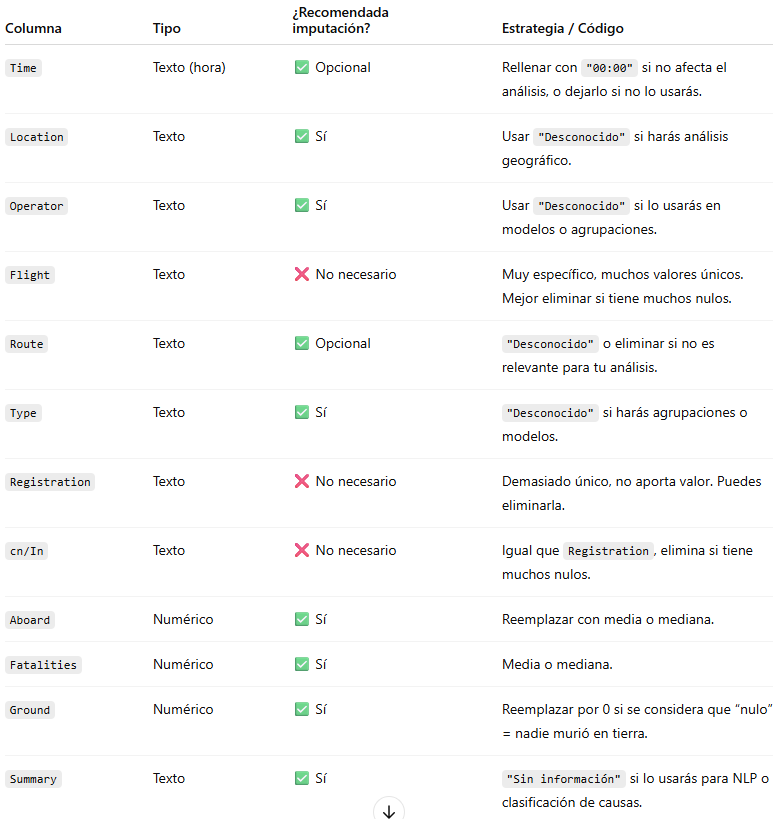


Notas:
* Podríamos ajustar los valores de imputación según la distribución (df['Aboard'].describe()).
* Si más adelante hacemos modelos, podríamos usar imputación más avanzada (como KNNImputer).
* El Summary es útil para análisis de texto, así que imputarlo con "Sin información" ayuda a evitar errores en NLP.

# Visualización de datos



In [ ]:
# Para visualizar los datos será necesario previamente realizar una transformación del campo Date a datetime
df_airplane['Date'] = pd.to_datetime(df_airplane['Date'])
df_airplane['Date'].sort_values(ascending=True).dt.year
# df_airplane['year'].dt.year

# Creamos una nueva columna 'year' extrayendo el año para mejorar la visualización de algunas gráficas
df_airplane['year'] = df_airplane['Date'].dt.year
df_airplane['year']

0       1908
1       1912
2       1913
3       1913
4       1913
        ... 
5263    2009
5264    2009
5265    2009
5266    2009
5267    2009
Name: year, Length: 5268, dtype: int32

In [ ]:
# Histogramas para variables numéricas
#num_columns = df_airplane.select_dtypes(include=['int64', 'float64']).columns

#plt.figure(figsize=(16, 20))
#for i, col in enumerate(num_columns, 1):
#    plt.subplot(5, 3, i)
        #sns.histplot(df_heart[col], kde=True, palette='husl') //alternativa
#    sns.histplot(data=df_airplane, x=col, hue=df_airplane['Time'], kde=True, palette='husl')
#    plt.title(f'Distribución de {col}')
#    plt.xlabel(col)
#    plt.ylabel('Frecuencia')
#plt.tight_layout()
#plt.show()

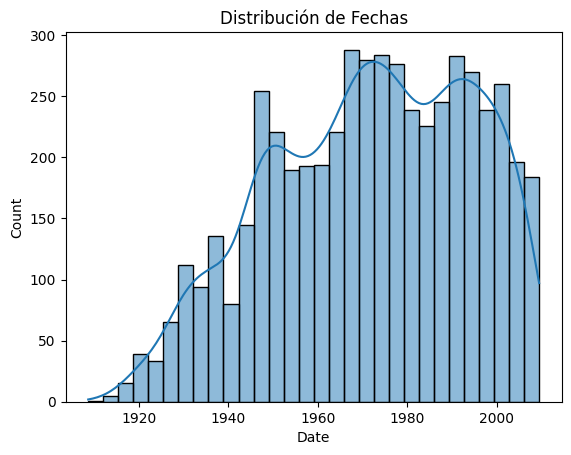

In [ ]:
#Visalizar la distribucion de fechas
sns.histplot(df_airplane['Date'], bins=30, kde=True)
plt.title("Distribución de Fechas")
plt.show()

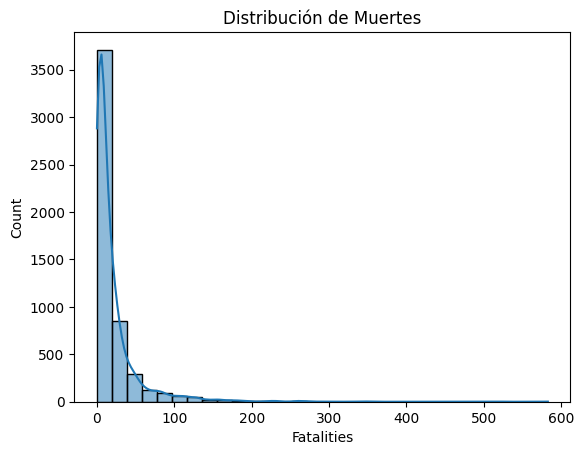

In [ ]:
#Visalizar la Distribucion de Muertos. [Analizar esos outlier]
sns.histplot(df_airplane['Fatalities'], bins=30, kde=True)
plt.title("Distribución de Muertes")
plt.show()
# Observamos un posible fuera de serie en el numero de casi 600 muertos en algún accidente

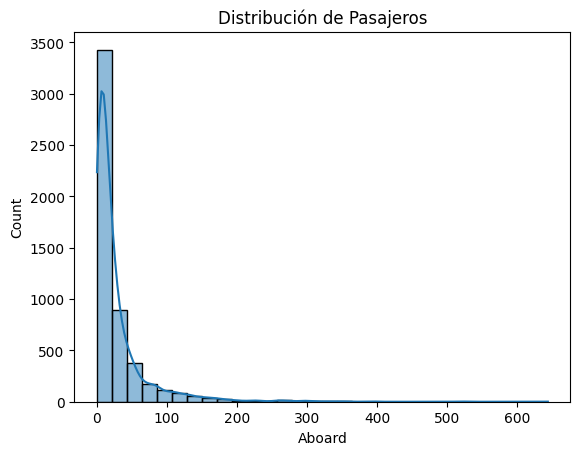

In [ ]:
# Visalizar la distribucion de tripulantes. [Analizar outlier]
sns.histplot(df_airplane['Aboard'], bins=30, kde=True)
plt.title("Distribución de Pasajeros")
plt.show()
# Observamos un posible fuera de serie en el numero de mas de 600 pasajeros en algún accidente

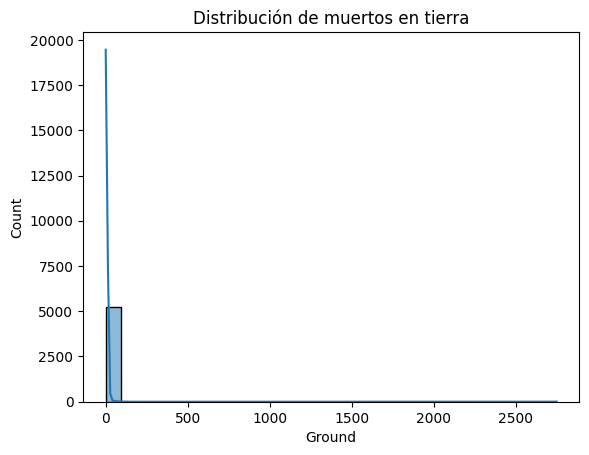

In [ ]:
# Visalizar la distribucion de Muertos en tierra. [Analizar outlier]
sns.histplot(df_airplane['Ground'], bins=30, kde=True)
plt.title("Distribución de muertos en tierra")
plt.show()

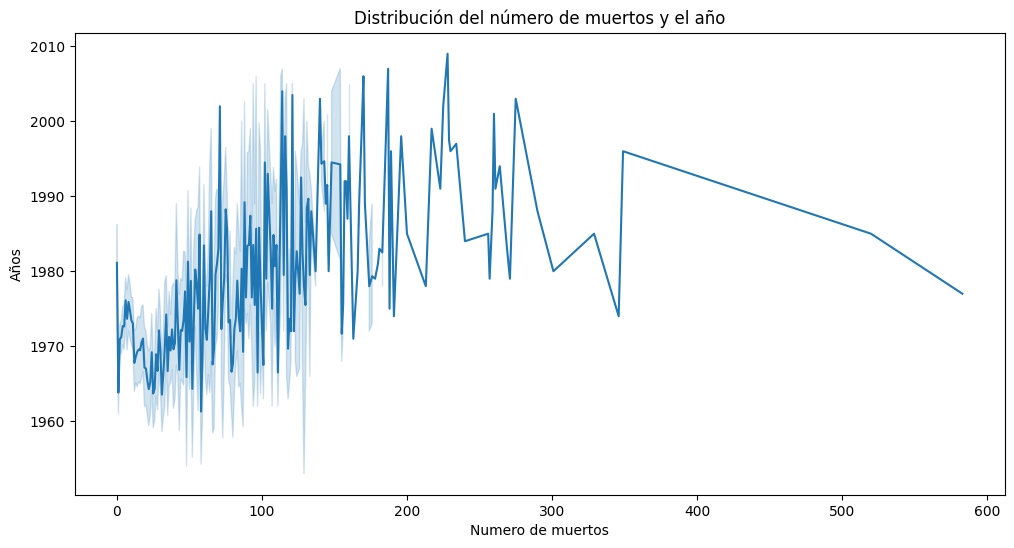

In [ ]:
# Relacion entre el número de muertos y el año
plt.figure(figsize=(12, 6))
sns.lineplot(x='Fatalities', y=df_airplane['Date'].dt.year, data=df_airplane)
plt.title("Distribución del número de muertos y el año")
plt.xlabel('Numero de muertos')
plt.ylabel('Años')
plt.show()

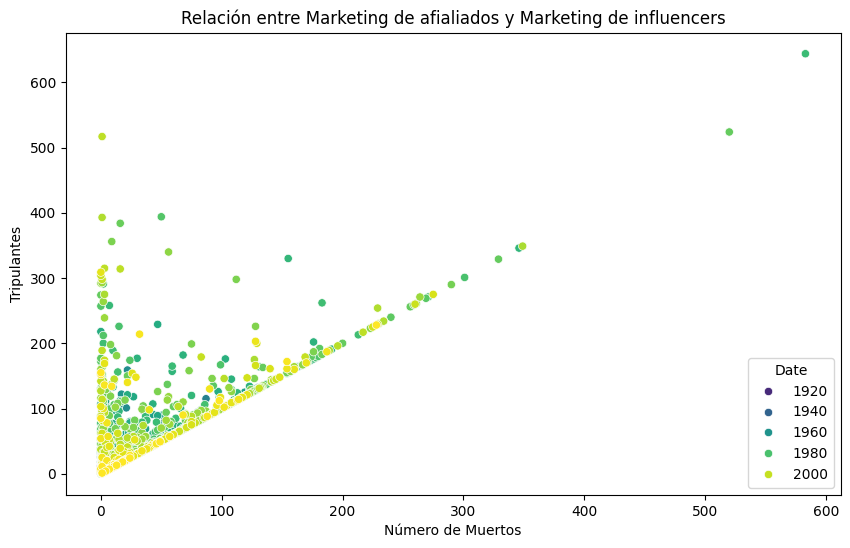

In [ ]:
# Relación entre Número de pasajeros y muertos por año
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Fatalities', y='Aboard', data=df_airplane, hue=df_airplane['Date'].dt.year, palette='viridis')
plt.title('Relación entre Marketing de afialiados y Marketing de influencers')
plt.xlabel('Número de Muertos')
plt.ylabel('Tripulantes')
plt.show()


In [ ]:
from ctypes import ArgumentError
# Listamos aquellas columnas que nos generan dudas con posibles outliers (Pasajeros y muertos)
# df_airplane[['Aboard', 'Fatalities']].sort_values(ascending=False, by='Aboard')
df_airplane.sort_values(ascending=False, by='Aboard')


Date   Time                                 Location  \
2963 1977-03-27  17:07                 Tenerife, Canary Islands   
3568 1985-08-12  18:56    Mt. Osutaka, near Ueno Village, Japan   
4645 1999-07-23  11:25                             Tokyo, Japan   
3378 1982-09-13  12:00                       Near Malaga, Spain   
4536 1997-12-28  23:10                     Over the PacifiOcean   
...         ...    ...                                      ...   
3323 1981-12-16    NaN                     Kuala Belait, Brunei   
3369 1982-08-11    NaN                              PacifiOcean   
3843 1989-05-09    NaN                      Near Tainjin, China   
4080 1992-02-20    NaN  En route from Argentina  to  California   
4705 2000-03-22    NaN                          Herreira, Spain   

                              Operator   Flight #  \
2963  Pan American World Airways / KLM  1736/4805   
3568                   Japan Air Lines        123   
4645                All Nippon Airways         61   
3378                           Spantax        995   
4536                  United Air Lines        826   
...                                ...        ...   
3323               Bristow Helicopters        NaN   
3369        Pan American World Airways        830   
3843                        Aero Asahi        NaN   
4080             Aerolineas Argentinas        386   
4705      Military - Ejército del Aire        NaN   

                                              Route  \
2963  Tenerife - Las Palmas / Tenerife - Las Palmas   
3568                                  Tokyo - Osaka   
4645                  Tokyo, Japan - Chitose, Japan   
3378                         Malaga - New York City   
4536                               Tokyo - Honolulu   
...                                             ...   
3323                                            NaN   
3369                               Tokyo - Honolulu   
3843                                            NaN   
4080                                            NaN   
4705                             Sevilla - Herreira   

                                      Type   Registration  \
2963  Boeing B-747-121 / Boeing B-747-206B  N736PA/PH-BUF   
3568                     Boeing B-747-SR46         JA8119   
4645                          Boeing B-747            NaN   
3378          McDonnell Douglas DC-10-30CF         EC-DEG   
4536                      Boeing B-747-122         N4723U   
...                                    ...            ...   
3323                     Aerospatiale Puma         9M-SSC   
3369                      Boeing B-747-121         N754PA   
3843                              Bell 412         JA9596   
4080                          Boeing B-747            NaN   
4705               CASA 212-DE Aviocar 200      TM-12D-73   

                     cn/In  Aboard  Fatalities  Ground  \
2963  19643/11 / 20400/157   644.0       583.0     0.0   
3568             20783/230   524.0       520.0     0.0   
4645                   NaN   517.0         1.0     0.0   
3378             46962/238   394.0        50.0     0.0   
4536             19882/175   393.0         1.0     0.0   
...                    ...     ...         ...     ...   
3323                  1481     NaN        12.0     0.0   
3369              19658/47     NaN         1.0     0.0   
3843                 33070     NaN        10.0     0.0   
4080                   NaN     NaN         1.0     0.0   
4705                   314     NaN         NaN     NaN   

                                                Summary  year  
2963  Both aircraft were diverted to Tenerife becaus...  1977  
3568  The aircraft suffered an aft pressure bulkhead...  1985  
4645  Two minutes after taking off from Haneda Airpo...  1999  
3378  The aircraft crashed during takeoff after inte...  1982  
4536  Two hours into the flight, at FL 310, the plan...  1997  
...                                                 ...   ...  
3323                          

**Investigación de los posibles outliers**

Según el accidente en Tenerife en 1977, se trató de lo siguiente:

 El impacto y el incendio resultante mataron a las 248 personas a bordo del avión de KLM y a 335 de las 396 personas a bordo del avión de Pan Am , con solo 61 sobrevivientes en la sección delantera de este último avión. Con un total de 583 víctimas mortales, el desastre es el accidente más mortífero en la historia de la aviación.
 Lo cual no representa un aoutliers ya que se trata de la colisión de dos aviones. Las filas se mantienen.

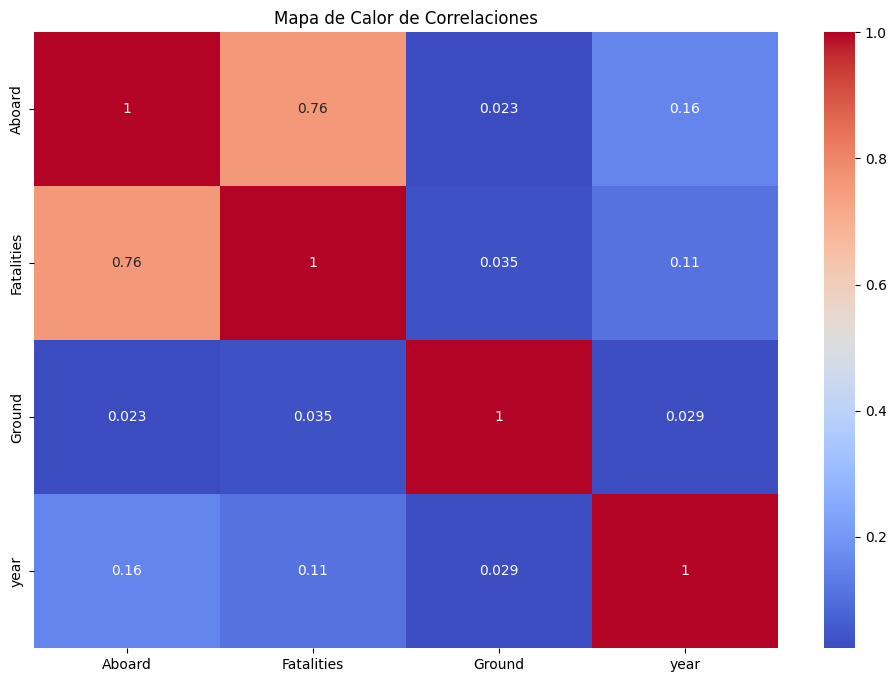

In [ ]:
# @title Mapa de Calor Correlaciones entre columnas numéricas
# Correlación entre las variables
plt.figure(figsize=(12, 8))
sns.heatmap(df_airplane.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlaciones')
plt.show()

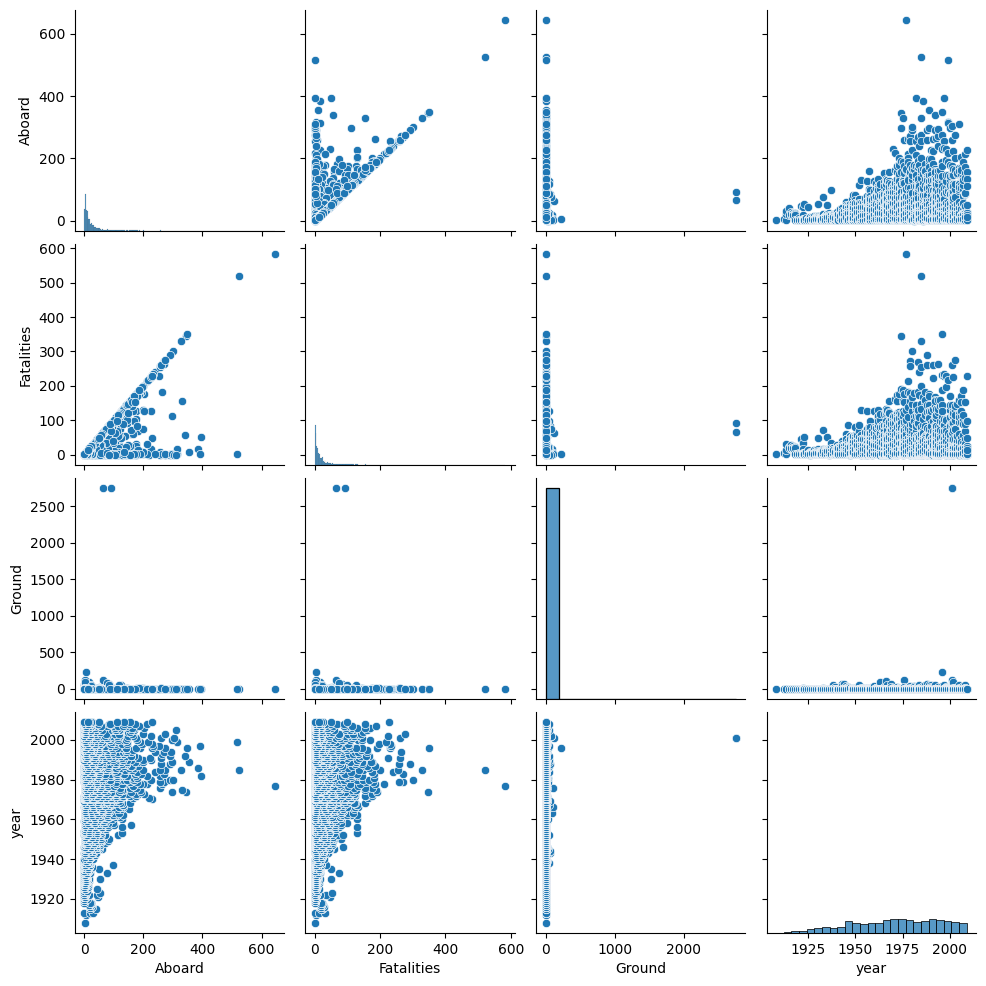

In [ ]:
sns.pairplot(df_airplane)
# to show
plt.show()

In [ ]:
!pip install ydata-profiling

In [ ]:
from ydata_profiling import ProfileReport

# Generar el reporte de pandas-profiling
profile = ProfileReport(df_airplane, title="Reporte de Análisis Exploratorio de Datos", explorative=True)

# Mostrar el reporte
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 14/14 [00:01<00:00,  9.51it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#4. **Preparación de los datos**


In [ ]:
# Missing values imputation
# Campo Time, Rellenar valores nulos con '00:00' y convertir a formato de hora
# Aplica la función a la columna Time solo si no es tipo datetime.time
from datetime import datetime, time

# Función para limpiar y convertir la hora
def convertir_hora(valor):
    try:
        if isinstance(valor, time):
            return valor  # Ya está en formato datetime.time
        elif pd.isnull(valor):
            return time(0, 0)  # Asigna 00:00 a los nulos
        else:
            return datetime.strptime(str(valor).strip(), "%H:%M").time()
    except:
        return time(0, 0)  # Si falla la conversión, asigna 00:00

# Aplica la función a la columna Time solo si no es tipo datetime.time
if not pd.api.types.is_datetime64_any_dtype(df_airplane['Time']) and df_airplane['Time'].dtype != 'object':
    df_airplane['Time'] = df_airplane['Time'].apply(convertir_hora)
else:
    # Siempre puedes forzar la conversión con seguridad si tienes dudas
    df_airplane['Time'] = df_airplane['Time'].apply(convertir_hora)


In [ ]:
# Campo Location, rellenar con "Desconocido" si es nulo
df_airplane['Location'] = df_airplane['Location'].fillna('Ubicación desconocida')

In [ ]:
# Campo Operator, rellenar con "Desconocido" si es nulo
df_airplane['Operator'] = df_airplane['Operator'].fillna('Aerolinea desconocida')

In [ ]:
# Campo Flight, rellenar con "Desconocido" si es nulo
df_airplane.rename(columns={'Flight #': 'Flight'}, inplace=True)
df_airplane['Flight'] = df_airplane['Flight'].fillna('Desconocido')

In [ ]:
# Campo Route, rellenar con "Desconocida" si es nulo
df_airplane['Route'] = df_airplane['Route'].fillna('Ruta desconocida')

In [ ]:
# Campo Type, rellenar con "Tipo Desconocido" si es nulo
df_airplane['Type'] = df_airplane['Type'].fillna('Ruta desconocida')

In [ ]:
# Campos Aboard, Fatalities, Ground → Reemplazar nulos por 0 y convertir a enteros
for col in ['Aboard', 'Fatalities', 'Ground']:
    df_airplane[col] = df_airplane[col].fillna(0).astype(int)

In [ ]:
# Campo Summary, rellenar con "Desconocido" si es nulo
df_airplane['Summary'] = df_airplane['Summary'].fillna('Desconocido')

In [ ]:
# Contabilizamos nuevamente campos nulos
print(df_airplane.isnull().sum())
df_airplane

Date               0
Time               0
Location           0
Operator           0
Flight             0
Route              0
Type               0
Registration     335
cn/In           1228
Aboard             0
Fatalities         0
Ground             0
Summary            0
year               0
dtype: int64


Date      Time                                           Location  \
0    1908-09-17  17:18:00                                Fort Myer, Virginia   
1    1912-07-12  06:30:00                            AtlantiCity, New Jersey   
2    1913-08-06  00:00:00                 Victoria, British Columbia, Canada   
3    1913-09-09  18:30:00                                 Over the North Sea   
4    1913-10-17  10:30:00                         Near Johannisthal, Germany   
...         ...       ...                                                ...   
5263 2009-05-20  06:30:00                             Near Madiun, Indonesia   
5264 2009-05-26  00:00:00                  Near Isiro, DemocratiRepubliCongo   
5265 2009-06-01  00:15:00  AtlantiOcean, 570 miles northeast of Natal, Br...   
5266 2009-06-07  08:30:00       Near Port Hope Simpson, Newfoundland, Canada   
5267 2009-06-08  00:00:00                  State of Arunachal Pradesh, India   

                             Operator       Flight  \
0                Military - U.S. Army  Desconocido   
1                Military - U.S. Navy  Desconocido   
2                             Private            -   
3              Military - German Navy  Desconocido   
4              Military - German Navy  Desconocido   
...                               ...          ...   
5263  Military - Indonesian Air Force  Desconocido   
5264                      Service Air  Desconocido   
5265                       Air France          447   
5266                       Strait Air  Desconocido   
5267      Military - Indian Air Force  Desconocido   

                                          Route  \
0                                 Demonstration   
1                                   Test flight   
2                              Ruta desconocida   
3                              Ruta desconocida   
4                              Ruta desconocida   
...                                         ...   
5263                           Jakarta - Maduin   
5264                               Goma - Isiro   
5265                     Rio de Janeiro - Paris   
5266  Lourdes de BlanSablon - Port Hope Simpson   
5267                         Mechuka for Jorhat   

                                  Type Registration cn/In  Aboard  Fatalities  \
0                     Wright Flyer III          NaN     1       2           1   
1                            Dirigible          NaN   NaN       5           5   
2                     Curtiss seaplane          NaN   NaN       1           1   
3               Zeppelin L-1 (airship)          NaN   NaN      20          14   
4               Zeppelin L-2 (airship)          NaN   NaN      30          30   
...                                ...          ...   ...     ...         ...   
5263           Lockheed C-130 Hercules       A-1325  1982     112          98   
5264                     Antonov An-26       9Q-CSA  5005       4           4   
5265                   Airbus A330-203       F-GZCP   660     228         228   
5266  Britten-Norman BN-2A-27 Islander      C-FJJR    424       1           1   
5267                     Antonov An-32          NaN   NaN      13          13   

      Ground                                            Summary  year  
0          0  During a demonstration flight, a U.S. Army fly...  1908  
1          0  First U.S. dirigible Akron exploded just offsh...  1912  
2          0  The first fatal airplane accident in Canada oc...  1913  
3          0  The airship flew into a thunderstorm and encou...  1913  
4          0  Hydrogen gas which was being vented was sucked...  1913  
...      ...                                                ...   ...  
5263       2  While on approach, the military transport cras...  2009  
5264       0  The cargo plane crashed while on approach to I...  2009  
5265       0  The Airbus went missing over the AtlantiOcean ...  2009  
5266       0  The air ambulance crashed into hills while att...  2009  
5267       0  The milit

In [ ]:
# Outliers
# Eliminar

In [ ]:
# Escalamiento o Scaling
from sklearn.preprocessing import StandardScaler
#print(df_heart.head())
#features_to_transform = ['trestbps', 'chol', 'thalach']
#scaler = StandardScaler()
#df_heart[features_to_transform] = scaler.fit_transform(df_heart[features_to_transform])
df_airplane

Date      Time                                           Location  \
0    1908-09-17  17:18:00                                Fort Myer, Virginia   
1    1912-07-12  06:30:00                            AtlantiCity, New Jersey   
2    1913-08-06  00:00:00                 Victoria, British Columbia, Canada   
3    1913-09-09  18:30:00                                 Over the North Sea   
4    1913-10-17  10:30:00                         Near Johannisthal, Germany   
...         ...       ...                                                ...   
5263 2009-05-20  06:30:00                             Near Madiun, Indonesia   
5264 2009-05-26  00:00:00                  Near Isiro, DemocratiRepubliCongo   
5265 2009-06-01  00:15:00  AtlantiOcean, 570 miles northeast of Natal, Br...   
5266 2009-06-07  08:30:00       Near Port Hope Simpson, Newfoundland, Canada   
5267 2009-06-08  00:00:00                  State of Arunachal Pradesh, India   

                             Operator       Flight  \
0                Military - U.S. Army  Desconocido   
1                Military - U.S. Navy  Desconocido   
2                             Private            -   
3              Military - German Navy  Desconocido   
4              Military - German Navy  Desconocido   
...                               ...          ...   
5263  Military - Indonesian Air Force  Desconocido   
5264                      Service Air  Desconocido   
5265                       Air France          447   
5266                       Strait Air  Desconocido   
5267      Military - Indian Air Force  Desconocido   

                                          Route  \
0                                 Demonstration   
1                                   Test flight   
2                              Ruta desconocida   
3                              Ruta desconocida   
4                              Ruta desconocida   
...                                         ...   
5263                           Jakarta - Maduin   
5264                               Goma - Isiro   
5265                     Rio de Janeiro - Paris   
5266  Lourdes de BlanSablon - Port Hope Simpson   
5267                         Mechuka for Jorhat   

                                  Type Registration cn/In  Aboard  Fatalities  \
0                     Wright Flyer III          NaN     1       2           1   
1                            Dirigible          NaN   NaN       5           5   
2                     Curtiss seaplane          NaN   NaN       1           1   
3               Zeppelin L-1 (airship)          NaN   NaN      20          14   
4               Zeppelin L-2 (airship)          NaN   NaN      30          30   
...                                ...          ...   ...     ...         ...   
5263           Lockheed C-130 Hercules       A-1325  1982     112          98   
5264                     Antonov An-26       9Q-CSA  5005       4           4   
5265                   Airbus A330-203       F-GZCP   660     228         228   
5266  Britten-Norman BN-2A-27 Islander      C-FJJR    424       1           1   
5267                     Antonov An-32          NaN   NaN      13          13   

      Ground                                            Summary  year  
0          0  During a demonstration flight, a U.S. Army fly...  1908  
1          0  First U.S. dirigible Akron exploded just offsh...  1912  
2          0  The first fatal airplane accident in Canada oc...  1913  
3          0  The airship flew into a thunderstorm and encou...  1913  
4          0  Hydrogen gas which was being vented was sucked...  1913  
...      ...                                                ...   ...  
5263       2  While on approach, the military transport cras...  2009  
5264       0  The cargo plane crashed while on approach to I...  2009  
5265       0  The Airbus went missing over the AtlantiOcean ...  2009  
5266       0  The air ambulance crashed into hills while att...  2009  
5267       0  The milit


---



#5. **Feature Selection** (Selección de características)

In [ ]:
# Clsificación por causas de accidentalidad
# Diccionario con palabras clave por categoría
keywords = {
    'Clima': ['storm', 'weather', 'turbulence', 'lightning', 'hail', 'wind'],
    'Fallo mecánico': ['engine failure', 'mechanical', 'malfunction', 'explosion', 'stall'],
    'Error humano': ['pilot error', 'misjudged', 'mistake', 'collision', 'overran', 'failed to'],
    'Derribo': ['shot down', 'missile', 'military', 'friendly fire'],
    'Incendio': ['fire', 'smoke', 'burning', 'on fire'],
    'Secuestro': ['hijack', 'terrorist', 'bomb', 'hostage', 'explosive'],
    'Desconocido': ['Desconocido']  # Fallback
}

# Función para clasificar resúmenes
def clasificar_causa(summary):
    summary_lower = summary.lower()
    for categoria, palabras in keywords.items():
        for palabra in palabras:
            if palabra in summary_lower:
                return categoria
    return 'Desconocido'

# Aplicar la clasificación
df_airplane['causes'] = df_airplane['Summary'].apply(clasificar_causa)

# Ver cuántos casos hay por categoría
print(df_airplane['causes'].value_counts())

# Ver solo los casos que no fueron clasificados por ninguna palabra clave:
no_clasificados = df_airplane[df_airplane['causes'] == 'Desconocido']
print(no_clasificados[['Summary']].head(10))

causes
Desconocido       2950
Clima              973
Fallo mecánico     518
Error humano       337
Incendio           255
Derribo            170
Secuestro           65
Name: count, dtype: int64
                                              Summary
0   During a demonstration flight, a U.S. Army fly...
1   First U.S. dirigible Akron exploded just offsh...
4   Hydrogen gas which was being vented was sucked...
7          Crashed near the Black Sea, cause unknown.
18  Exploded and crashed into the sea off the sout...
21                                        Desconocido
23                                        Desconocido
24                                        Desconocido
25                                        Desconocido
26                                        Desconocido


In [ ]:
# Eliminamos las columnas 'Registration' y 'cn/In', siempre y cuando estas culmnas existan
if 'Registration' in df_airplane.columns and 'cn/In' in df_airplane.columns:
  df_airplane = df_airplane.drop(columns=['Registration', 'cn/In'])
  df_airplane

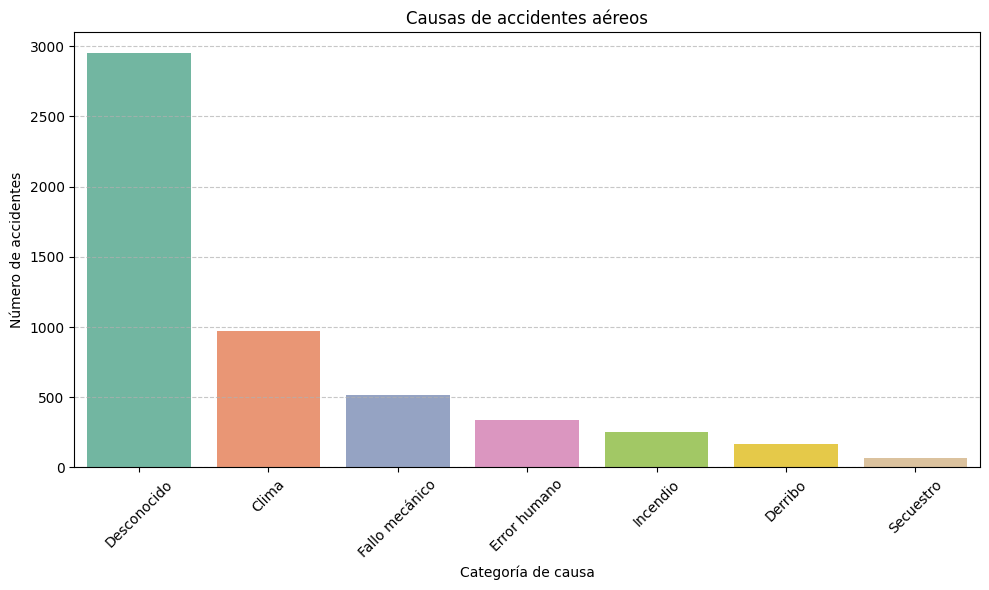

In [ ]:
# Graficamos los indices de causalidad de accidentes
import seaborn as sns

causes_counts = df_airplane['causes'].value_counts()
plt.figure(figsize=(10, 6))
sns.countplot(data=df_airplane, x='causes', order=causes_counts.index, palette='Set2', legend=False)
plt.title('Causas de accidentes aéreos')
plt.xlabel('Categoría de causa')
plt.ylabel('Número de accidentes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Features (x) vs Target (y)**

In [ ]:
X = df_airplane.drop(columns=['causes'], axis=1)
y = df_airplane['causes']

**Trainig - Test split**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Escalado no se puede realizar en este caso, ya que las X no todas son numericas
#from sklearn.feature_selection import SelectKBest # Métodos integrados o Métodos basados en modelos
#from sklearn.feature_selection import chi2 # Métodos filtro basado en correlaciones
#test = SelectKBest(score_func=chi2, k=4)
#fit = test.fit(X_train, y_train)
#X_selected = fit.transform(X_train)
#X_selected


# **6. Entrenamiento de Modelos** (seleccionar los mejores)

Para este caso aplicaremos modelos varios modelos de Clasificación, Regresión y Clustering

  1. Clasificación: Causas del accidente (causes)

    Modelos recomendados:
    * RandomForestClassifier
    * XGBClassifier
    * LogisticRegression (si reduces clases a pocas)
    * MultinomialNB (requiere ingeniería de texto sobre Summary)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Procesamiento de texto
from sklearn.feature_extraction.text import CountVectorizer

# Modelos de clasificación
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Métricas de evaluación (opcional pero recomendado)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Codificación de etiquetas
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_airplane['causes'].dropna()) # Se independiza la columna causes del resto

# Ingeniería de características simple (por ejemplo, vectores de palabras)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_airplane['Summary'].dropna()) # Se independiza la columna Summary del resto

# División de datos
X_train_clasi, X_test_clasi, y_train_clasi, y_test_clasi = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train_clasi, y_train_clasi)
print("Random Forest\n", classification_report(y_test_clasi, rf.predict(X_test_clasi)))

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train_clasi, y_train_clasi)
print("XGBoost\n", classification_report(y_test_clasi, xgb.predict(X_test_clasi)))

# Logistic Regression
lr = LogisticRegression(max_iter=500)
lr.fit(X_train_clasi, y_train_clasi)
print("Logistic Regression\n", classification_report(y_test_clasi, lr.predict(X_test_clasi)))

# Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_clasi, y_train_clasi)
print("Naive Bayes\n", classification_report(y_test_clasi, nb.predict(X_test_clasi)))


Random Forest
               precision    recall  f1-score   support

           0       0.97      0.83      0.89       195
           1       0.94      0.71      0.81        24
           2       0.83      0.99      0.90       599
           3       0.94      0.52      0.67        64
           4       0.94      0.58      0.72       115
           5       0.85      0.83      0.84        47
           6       0.60      0.30      0.40        10

    accuracy                           0.87      1054
   macro avg       0.87      0.68      0.75      1054
weighted avg       0.88      0.87      0.86      1054

XGBoost
               precision    recall  f1-score   support

           0       0.99      0.95      0.97       195
           1       0.89      1.00      0.94        24
           2       0.97      0.99      0.98       599
           3       0.92      0.88      0.90        64
           4       0.94      0.94      0.94       115
           5       0.98      0.87      0.92        47


**Conclusión para Clasificación**:

Teniendo en cuenta que la clasificación para este conjuntod de datos es algo desbalanceada, el mejor modelo para este conjunto de datos es **XGBoost**.

Analizando la media armónica entre precisión y recall, las métricas como la "Accuracy" y el "Weighted avg", nos arroja un valor muy favorable de **96%**, y que probablemente más adelante lo podamos mejorar


---




2. Regresión: Número de muertes (Fatalities)
    
    Modelos recomendados:
    * LinearRegression
    * RandomForestRegressor
    * XGBRegressor
    * MLPRegressor (neural network)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

X = df_airplane[['Aboard']].fillna(0)
y = df_airplane['Fatalities'].fillna(0)

X_train_regre, X_test_regre, y_train_regre, y_test_regre = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Linear': LinearRegression(),
    'RandomForest': RandomForestRegressor(),
    'XGBoost': XGBRegressor(),
    'MLP': MLPRegressor(max_iter=500)
}

for name, model in models.items():
    model.fit(X_train_regre, y_train_regre)
    preds = model.predict(X_test_regre)
    print(f"{name} -> MAE: {mean_absolute_error(y_test_regre, preds):.2f}, MSE: {mean_squared_error(y_test_regre, preds):.2f}, R²: {r2_score(y_test_regre, preds):.2f}")

Linear -> MAE: 9.60, MSE: 459.01, R²: 0.60
RandomForest -> MAE: 8.38, MSE: 647.96, R²: 0.43
XGBoost -> MAE: 8.38, MSE: 754.75, R²: 0.34
MLP -> MAE: 8.53, MSE: 451.00, R²: 0.61


**Conclusión para regresión**

Estudiando la regresión entre TRIPULANTES y FALLECIDOS, aunque Random Forest tiene menor MAE, su capacidad para explicar la variación de los datos (R²) es menor.

* **MLPRegressor** tiene el mejor balance general entre error medio (MAE), error cuadrático (MSE) y varianza explicada (R²).



---


3. Agrupamiento (Clustering)

  Modelos:
  * KMeans
  * DBSCAN
  * PCA para reducción de dimensionalidad

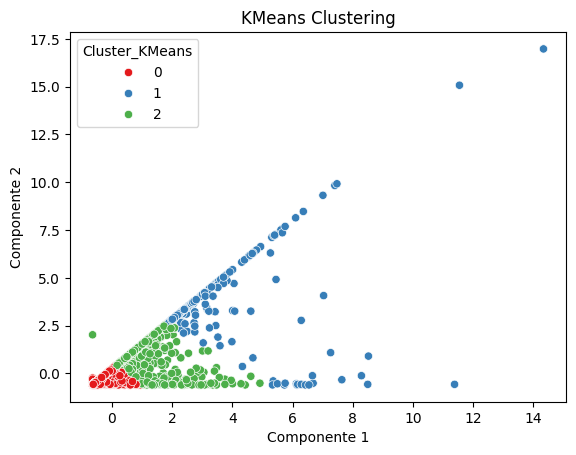

Interpretación
Se identificaron 3 clusters principales (rojo, azul y verde).
La distribución es más limpia y estructurada comparada con DBSCAN.
El cluster 0 (rojo) es muy pequeño, lo que podría representar un grupo de accidentes con características particulares.
El cluster 1 (azul) domina, lo que puede implicar que muchos datos comparten características similares.


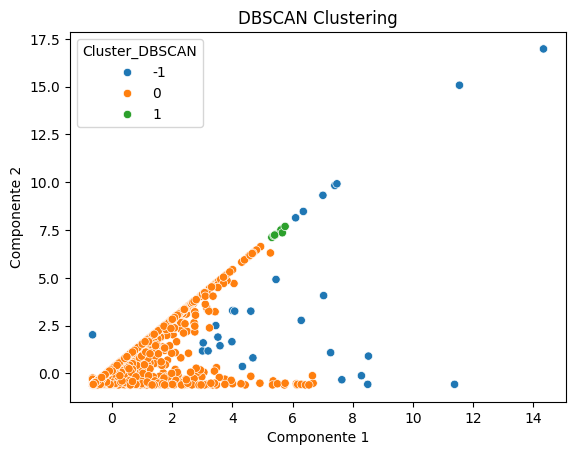

Interpretación
Se identificaron 2 clusters principales (naranja y verde).
Muchos puntos están etiquetados como -1 (azul), lo que indica que DBSCAN detectó muchos puntos como ruido. 
Esto puede suceder si los parámetros eps y min_samples no están bien ajustados
El cluster 0 domina, lo que puede implicar que muchos datos comparten características similares.
El cluster 1 (verde) es muy pequeño, lo que podría representar un grupo de accidentes con características particulares.


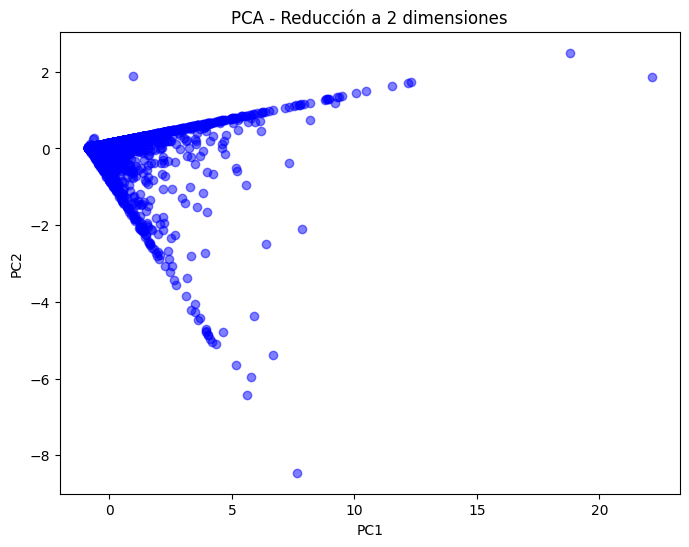

Etiqueta:
0, 1: Clusters identificados.
-1: Ruido o outliers.
Interpretación:
-La forma triangular sugiere alta concentración de la varianza en pocas dimensiones, es decir, los datos están sesgados hacia ciertas variables.
Muchos puntos están concentrados cerca del origen (0,0), lo que podría indicar que muchas observaciones tienen características similares.
Algunos outliers están dispersos fuera del grupo principal (posibles casos extremos o errores).


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# Estandarizar
features = df_airplane[['Aboard', 'Fatalities']].fillna(0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# ------------------- K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df_airplane['Cluster_KMeans'] = kmeans.fit_predict(X_scaled)

# Visualizar con un par de variables (puedes usar PCA para reducir primero)
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df_airplane['Cluster_KMeans'], palette='Set1')
plt.title('KMeans Clustering')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show()

print("Interpretación")
print("Se identificaron 3 clusters principales (rojo, azul y verde).")
print("La distribución es más limpia y estructurada comparada con DBSCAN.")
print("El cluster 0 (rojo) es muy pequeño, lo que podría representar un grupo de accidentes con características particulares.")
print("El cluster 1 (azul) domina, lo que puede implicar que muchos datos comparten características similares.")

# ------------------- DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df_airplane['Cluster_DBSCAN'] = dbscan.fit_predict(X_scaled)

# Visualizar (los valores -1 indican "ruido" o puntos no agrupados)
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df_airplane['Cluster_DBSCAN'], palette='tab10')
plt.title('DBSCAN Clustering')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show()

print("Interpretación")
print("Se identificaron 2 clusters principales (naranja y verde).")
print("Muchos puntos están etiquetados como -1 (azul), lo que indica que DBSCAN detectó muchos puntos como ruido. \nEsto puede suceder si los parámetros eps y min_samples no están bien ajustados")
print("El cluster 0 domina, lo que puede implicar que muchos datos comparten características similares.")
print("El cluster 1 (verde) es muy pequeño, lo que podría representar un grupo de accidentes con características particulares.")

# -------------------- PCA
# Reducir a 2 dimensiones
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
df_airplane['PCA1'] = components[:, 0]
df_airplane['PCA2'] = components[:, 1]

# Graficar componentes principales
plt.figure(figsize=(8,6))
plt.scatter(df_airplane['PCA1'], df_airplane['PCA2'], c='blue', alpha=0.5)
plt.title('PCA - Reducción a 2 dimensiones')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

print("""Etiqueta:
0, 1: Clusters identificados.
-1: Ruido o outliers.""")
print("Interpretación:")
print("-La forma triangular sugiere alta concentración de la varianza en pocas dimensiones, es decir, los datos están sesgados hacia ciertas variables.")
print("Muchos puntos están concentrados cerca del origen (0,0), lo que podría indicar que muchas observaciones tienen características similares.")
print("Algunos outliers están dispersos fuera del grupo principal (posibles casos extremos o errores).")

# Conclusión final evaluando Modelos los 3 tipos de modelos
Según los datos arrojados, los que mejor rendimiento según el tipo, son:

* En clasificación: **XGBoost** con 96%
* En regresión: **MLPRegressor** con MAE: 8.61, MSE: 454.95, R²: 0.60
* En Clustering: **KMeans**, La distribución es más limpia y estructurada comparada con DBSCAN.


# **6. Optimización de Modelo** Ajuste de hiperparámetros

Ajustar los parámetros y qué el modelo arroje mejores resultados

In [ ]:
# @title Optimización de XGBoost Classifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Definir el modelo base
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Definir el grid
param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1]
}

# Aplicar GridSearchCV
grid_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, scoring='f1_macro', cv=5, n_jobs=-1, verbose=1)
grid_xgb.fit(X_train_clasi, y_train_clasi)

# Mejor modelo
print("Mejores parámetros:", grid_xgb.best_params_)
print("Mejor score:", grid_xgb.best_score_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Mejores parámetros: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1}
Mejor score: 0.8953284614868599


In [ ]:
# @title Optimización de MLPRegressor - Regresión
from sklearn.neural_network import MLPRegressor

param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs'],
    'alpha': [0.0001, 0.001],
    'max_iter': [500]
}

mlp = MLPRegressor(random_state=42)

grid_mlp = GridSearchCV(estimator=mlp, param_grid=param_grid_mlp, scoring='r2', cv=5, n_jobs=-1, verbose=1)
grid_mlp.fit(X_train_regre, y_train_regre)

print("Mejores parámetros:", grid_mlp.best_params_)
print("Mejor score:", grid_mlp.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Mejores parámetros: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'max_iter': 500, 'solver': 'adam'}
Mejor score: 0.5670436147109525


In [ ]:
# @title Optimización de KMeans - Clustering
# Como KMeans es no supervisado, usamos la métrica de índice de silueta para evaluar los resultados en vez de GridSearchCV
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

params_kmeans = {
    'n_clusters': [2, 3, 4, 5, 6],
    'init': ['k-means++', 'random'],
    'n_init': [10, 20],
    'max_iter': [300, 500]
}

best_score = -1
best_model = None
best_params = {}

# Búsqueda manual
for k in params_kmeans['n_clusters']:
    for init in params_kmeans['init']:
        for n_init in params_kmeans['n_init']:
            for max_iter in params_kmeans['max_iter']:
                model = KMeans(n_clusters=k, init=init, n_init=n_init, max_iter=max_iter, random_state=42)
                labels = model.fit_predict(X_scaled)  # X_scaled debe estar previamente estandarizado
                score = silhouette_score(X_scaled, labels)

                if score > best_score:
                    best_score = score
                    best_model = model
                    best_params = {'n_clusters': k, 'init': init, 'n_init': n_init, 'max_iter': max_iter}

print("Mejores parámetros:", best_params)
print("Mejor silueta:", best_score)

Mejores parámetros: {'n_clusters': 2, 'init': 'k-means++', 'n_init': 10, 'max_iter': 300}
Mejor silueta: 0.7908470081493177


In [ ]:
# @title Guardar los modelos optimizados
# Una vez hayamos obtenido el algoritmo que mejor se adapte al problema y el error sea mas cecano a 1. Lo guardamos
# Guardar el modelo Ridge (puedes cambiarlo por Lasso si usaste ese)
!pip install joblib
import joblib

# Guardar el mejor modelo de clasificación (XGBoost)
joblib.dump(grid_xgb.best_estimator_, 'modelo_clasificacion_xgb.pkl')

# Guardar el mejor modelo de regresión (MLPRegressor)
joblib.dump(grid_mlp.best_estimator_, 'modelo_regresion_mlp.pkl')

# Guardar el mejor modelo de clustering (KMeans)
joblib.dump(best_model, 'modelo_clustering_kmeans.pkl')

['modelo_clustering_kmeans.pkl']